## 1. Processing & Exploratory

In [1]:
import numpy as np
import pandas as pd
from datetime import date
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns",80)
pd.set_option("display.max_rows",1000)

In [2]:
dfoff = pd.read_csv('data/ml100marathon-02-01/train_offline.csv')
dftest = pd.read_csv('data/ml100marathon-02-01/test_offline.csv')
dfoff.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
1,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
2,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
3,1832624,3381,7610.0,200:20,0.0,20160429.0,NaN
4,2029232,3381,11951.0,200:20,1.0,20160129.0,NaN


In [3]:
dfoff[dfoff['User_id'] == 2956333].sort_values('Date_received')

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
650141,2956333,4142,4773.0,100:10,0.0,20160123.0,20160123.0
650127,2956333,4142,4773.0,100:10,0.0,20160123.0,20160126.0
650092,2956333,3710,13056.0,150:10,1.0,20160125.0,NaN
650143,2956333,450,8555.0,30:5,4.0,20160125.0,NaN
650134,2956333,4142,4773.0,100:10,0.0,20160125.0,20160126.0
650120,2956333,6284,7379.0,50:10,10.0,20160125.0,NaN
650119,2956333,6434,10050.0,50:5,2.0,20160125.0,NaN
650109,2956333,4660,1480.0,100:10,10.0,20160125.0,NaN
650156,2956333,3710,13056.0,150:10,1.0,20160125.0,NaN
650099,2956333,760,3237.0,20:5,0.0,20160125.0,NaN


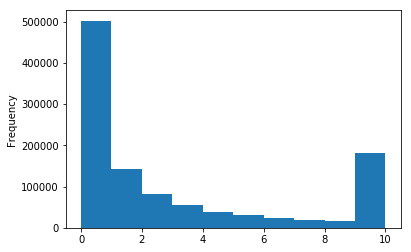

In [4]:
dfoff['Distance'].plot.hist(10);

## 2. Data Cleaning & Feature Engineering

In [5]:
# dfoff = dfoff[:100000]
# dftest = dftest[:10000]

In [6]:
## Creat target label 
"""
According to the definition, 
1) buy with coupon within (include) 15 days ==> 1
2) buy with coupon but out of 15 days ==> 0
3) buy without coupon ==> -1 (we don't care)
"""
def label(row):
    if np.isnan(row['Date_received']):
        return -1
    if not np.isnan(row['Date']):
        td = pd.to_datetime(row['Date'], format='%Y%m%d') -  pd.to_datetime(row['Date_received'], format='%Y%m%d')
        if td <= pd.Timedelta(15, 'D'):
            return 1
    return 0

dfoff["label"] = dfoff.apply(label, axis=1)
dfoff["label"].value_counts()

 0    710665
-1    413773
 1     36304
Name: label, dtype: int64

#### from baseline example

In [7]:
# Generate features - weekday acquired coupon
def getWeekday(row):
    if (np.isnan(row)) or (row==-1):
        return row
    else:
        return pd.to_datetime(row, format = "%Y%m%d").dayofweek + 1 # add one to make it from 0~6 -> 1~7

dfoff['weekday'] = dfoff['Date_received'].apply(getWeekday)
dftest['weekday'] = dftest['Date_received'].apply(getWeekday)

# weekday_type (weekend = 1)
dfoff['weekday_type'] = dfoff['weekday'].apply(lambda x : 1 if x in [6, 7] else 0 ) # apply to trainset
dftest['weekday_type'] = dftest['weekday'].apply(lambda x : 1 if x in [6, 7] else 0 ) # apply to testset

In [8]:
weekdaycols = ['weekday_' + str(i) for i in range(1,8)]
print(weekdaycols)

tmpdf = pd.get_dummies(dfoff['weekday'].replace(-1, np.nan))
tmpdf.columns = weekdaycols
dfoff[weekdaycols] = tmpdf

tmpdf = pd.get_dummies(dftest['weekday'].replace(-1, np.nan))
tmpdf.columns = weekdaycols
dftest[weekdaycols] = tmpdf

['weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday_7']


In [9]:
# Generate features - coupon discount and distance
def getDiscountType(row):
    if row == 'null':
        return 'null'
    elif ':' in row:
        return 1
    else:
        return 0

def convertRate(row):
    """Convert discount to rate"""
    if row == 'null':
        return 1.0
    elif ':' in row:
        rows = row.split(':')
        return 1.0 - float(rows[1])/float(rows[0])
    else:
        return float(row)

def getDiscountMan(row):
    if ':' in row:
        rows = row.split(':')
        return int(rows[0])
    else:
        return 0

def getDiscountJian(row):
    if ':' in row:
        rows = row.split(':')
        return int(rows[1])
    else:
        return 0

def processData(df):
    
    # convert discunt_rate
    df['discount_rate'] = df['Discount_rate'].astype('str').apply(convertRate)
    df['discount_man'] = df['Discount_rate'].astype('str').apply(getDiscountMan)
    df['discount_jian'] = df['Discount_rate'].astype('str').apply(getDiscountJian)
    df['discount_type'] = df['Discount_rate'].astype('str').apply(getDiscountType)
    
    # convert distance
    df.loc[df.Distance.isna(), "Distance"] = 11
    return df

dfoff = processData(dfoff)
dftest = processData(dftest)

#### add new feature

In [10]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

def add_new_feature(df):
    ## Merchant sent coupon count/month
    tmp_df = df[['User_id', 'Merchant_id', 'Coupon_id', 'Date_received']].copy()
    tmp_df['Date'] = pd.to_datetime(dfoff['Date_received'], format = "%Y%m%d")
    tmp_df['Month'] = tmp_df['Date'].apply(lambda x: x.month)
    
    ## 計算商家與使用者的 coupon數量
    # coupon 當月發送數量
    tmp_df['this_month_counpon_send'] = tmp_df.groupby(['Coupon_id', 'Month'])['User_id'].transform('count')
    # 商家當月 coupon 發送數量
    tmp_df['this_month_Merchant_counpon_send'] = tmp_df.groupby(['Merchant_id', 'Month'])['Coupon_id'].transform('count')
    # 使用者當月 coupon 收到數量
    tmp_df['this_month_User_counpon_received'] = tmp_df.groupby(['User_id', 'Month'])['Coupon_id'].transform('count')
    # 使用者當月 coupon 收到數量 (分商家)
    tmp_df['this_month_User_counpon_received_by_Merchant'] = tmp_df.groupby(['User_id', 'Merchant_id', 'Month'])['Coupon_id'].transform('count')
    
    tmp_df.fillna(value={'this_month_counpon_send': 0,
                         'this_month_Merchant_counpon_send': 0,
                         'this_month_User_counpon_received': 0,
                         'this_month_User_counpon_received_by_Merchant': 0},
                 inplace=True)
    
    ## 計算使用者 coupon 最後收到天數
    tmp_df.sort_values(['User_id', 'Date'], inplace=True)
    tmp_df['Date_diff'] = tmp_df.groupby('User_id')['Date'].diff().apply(lambda x: x.days)
    tmp_df['Date_diff'].fillna((tmp_df['Date'].max() - tmp_df['Date'].min()).days, inplace=True)
    
    ## 標準化    
    tmp_df['this_month_counpon_send'] = min_max_scaler.fit_transform(tmp_df[['this_month_counpon_send']])
    tmp_df['this_month_Merchant_counpon_send'] = min_max_scaler.fit_transform(tmp_df[['this_month_Merchant_counpon_send']])
    tmp_df['this_month_User_counpon_received'] = min_max_scaler.fit_transform(tmp_df[['this_month_User_counpon_received']])
    tmp_df['this_month_User_counpon_received_by_Merchant'] = min_max_scaler.fit_transform(tmp_df[['this_month_User_counpon_received_by_Merchant']])
    tmp_df['Date_diff'] = min_max_scaler.fit_transform(tmp_df[['Date_diff']])
    
    ## Merge
    tmp_df.drop(['User_id', 'Merchant_id', 'Coupon_id', 'Date_received', 'Month', 'Date'], inplace=True, axis=1)
    return pd.merge(df, tmp_df, left_index=True, right_index=True)

In [11]:
dfoff = add_new_feature(dfoff)
dftest = add_new_feature(dftest)

## Split data

In [43]:
## Naive model 資料切割
def split_train_valid(row, date_cut="20160416"):
    is_train = True if pd.to_datetime(row, format="%Y%m%d") < pd.to_datetime(date_cut, format="%Y%m%d") else False
    return is_train
    
df = dfoff[dfoff['label'] != -1].copy()
df["is_train"] = df["Date_received"].apply(split_train_valid)
train = df[df["is_train"]]
valid = df[~df["is_train"]]
train.reset_index(drop=True, inplace=True)
valid.reset_index(drop=True, inplace=True)
print("Train size: {}, #positive: {}".format(len(train), train["label"].sum()))
print("Valid size: {}, #positive: {}".format(len(valid), valid["label"].sum()))

Train size: 667753, #positive: 32472
Valid size: 79216, #positive: 3832


In [44]:
original_feature = [
    'discount_rate',
    'discount_type',
#     'discount_man', 
#     'discount_jian',
    'Distance', 
#     'weekday', 
#     'weekday_type'
] + [
    'this_month_counpon_send',
    'this_month_Merchant_counpon_send', 
    'this_month_User_counpon_received', 
    'this_month_User_counpon_received_by_Merchant', 
    'Date_diff'
] + weekdaycols

print(len(original_feature),original_feature)

15 ['discount_rate', 'discount_type', 'Distance', 'this_month_counpon_send', 'this_month_Merchant_counpon_send', 'this_month_User_counpon_received', 'this_month_User_counpon_received_by_Merchant', 'Date_diff', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday_7']


In [42]:
dfoff[dfoff['label'] != -1][original_feature + ['label']].head()

,discount_rate,discount_type,discount_man,discount_jian,Distance,weekday,weekday_type,this_month_counpon_send,this_month_Merchant_counpon_send,this_month_User_counpon_received,this_month_User_counpon_received_by_Merchant,Date_diff,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,label
1,0.95,1,20,1,0.0,3.0,0,0.000257,0.000192,0.013699,0.015385,1.000000,0,0,1,0,0,0,0,0
2,0.95,1,20,1,0.0,6.0,1,0.000103,0.000133,0.013699,0.015385,0.258333,0,0,0,0,0,1,0,0
3,0.90,1,200,20,0.0,5.0,0,1.000000,0.574603,0.013699,0.015385,1.000000,0,0,0,0,1,0,0,0
4,0.90,1,200,20,1.0,5.0,0,0.653948,1.000000,0.013699,0.015385,1.000000,0,0,0,0,1,0,0,0
5,0.50,1,10,5,2.0,5.0,0,0.259924,1.000000,0.013699,0.015385,1.000000,0,0,0,0,1,0,0,0


## Training & Validation

In [15]:
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import log_loss, roc_auc_score, auc, roc_curve
from sklearn.preprocessing import MinMaxScaler

#### RandomForestRegressor with GridSearchCV

In [16]:
break

SyntaxError: 'break' outside loop (<ipython-input-16-b20fcc2397e7>, line 1)

In [45]:
param_rfr = {
    'n_estimators': list(range(27,33)),
    'max_depth': list(range(9, 13)),
}
rfr = RandomForestRegressor()

grid_search = GridSearchCV(rfr, param_rfr, scoring="roc_auc", n_jobs=-1, verbose=1)

grid_result = grid_search.fit(train[original_feature], train['label'])

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  7.7min finished


In [46]:
print(grid_result.best_params_)

rfr = RandomForestRegressor(
    n_estimators=grid_result.best_params_['n_estimators'],
    max_depth=grid_result.best_params_['max_depth']
)

rfr.fit(train[original_feature], train['label'])

pre_valid = rfr.predict(valid[original_feature])

{'max_depth': 12, 'n_estimators': 28}


In [47]:
from sklearn.metrics import roc_auc_score, accuracy_score
auc_score = roc_auc_score(y_true=valid['label'], y_score=pre_valid)
acc = accuracy_score(y_true=valid['label'], y_pred=np.around(pre_valid))
print("Validation AUC: {:.3f}, Accuracy: {:.3f}".format(auc_score, acc))

Validation AUC: 0.858, Accuracy: 0.953


In [ ]:
for idx, val in enumerate(original_feature):
    print(f'{val}: {rfr.feature_importances_[idx]}')

##### SGDClassifier

In [17]:
param_sgd = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'l1_ratio': [0.0001, 0.001, 0.01, 0.1],
}
sgd = SGDClassifier()

grid_search = GridSearchCV(sgd, param_sgd, scoring="roc_auc", n_jobs=-1, verbose=1)

grid_result = grid_search.fit(train[original_feature], train['label'])

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   30.8s finished


In [18]:
print(grid_result.best_params_)

sgd = SGDClassifier(
    alpha=grid_result.best_params_['alpha'],
    l1_ratio=grid_result.best_params_['l1_ratio']
)

sgd.fit(train[original_feature], train['label'])

pre_valid = sgd.predict(valid[original_feature])

{'alpha': 0.0001, 'l1_ratio': 0.01}


In [19]:
from sklearn.metrics import roc_auc_score, accuracy_score
auc_score = roc_auc_score(y_true=valid['label'], y_score=pre_valid)
acc = accuracy_score(y_true=valid['label'], y_pred=np.around(pre_valid))
print("Validation AUC: {:.3f}, Accuracy: {:.3f}".format(auc_score, acc))

Validation AUC: 0.507, Accuracy: 0.952


#### test

In [34]:
predictors = original_feature
print(predictors)

def check_model(data, predictors):
    
    classifier = lambda: RandomForestRegressor(
        max_depth=12
    )

    model = Pipeline(steps=[
        ('ss', StandardScaler()),
        ('en', classifier())
    ])

    parameters = {
        'en__n_estimators': list(range(27,33))
    }

    folder = StratifiedKFold(n_splits=5, shuffle=True)
    
    grid_search = GridSearchCV(
        model, 
        parameters, 
        scoring="roc_auc",
        cv=folder, 
        n_jobs=-1, 
        verbose=1)
    grid_search = grid_search.fit(data[predictors], 
                                  data['label'])
    
    return grid_search

['discount_rate', 'discount_type', 'discount_man', 'discount_jian', 'Distance', 'weekday', 'weekday_type', 'this_month_counpon_send', 'this_month_Merchant_counpon_send', 'this_month_User_counpon_received', 'this_month_User_counpon_received_by_Merchant', 'Date_diff', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday_7']


In [35]:
model = check_model(train, predictors)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.9min finished


In [36]:
print(model.best_params_)
pre_valid = model.predict(valid[original_feature])

{'en__n_estimators': 31}


In [37]:
from sklearn.metrics import roc_auc_score, accuracy_score
auc_score = roc_auc_score(y_true=valid['label'], y_score=pre_valid)
acc = accuracy_score(y_true=valid['label'], y_pred=np.around(pre_valid))
print("Validation AUC: {:.3f}, Accuracy: {:.3f}".format(auc_score, acc))

Validation AUC: 0.854, Accuracy: 0.953


#### example

In [ ]:
predictors = original_feature
print(predictors)

def check_model(data, predictors):
    
    classifier = lambda: SGDClassifier(
        loss='log', 
        penalty='elasticnet', 
        fit_intercept=True, 
        max_iter=100, 
        shuffle=True, 
        n_jobs=1,
        class_weight=None)

    model = Pipeline(steps=[
        ('ss', MinMaxScaler()),
        ('en', classifier())
    ])

    parameters = {
        'en__alpha': [ 0.001, 0.01, 0.1],
        'en__l1_ratio': [ 0.001, 0.01, 0.1]
    }

    folder = StratifiedKFold(n_splits=3, shuffle=True)
    
    grid_search = GridSearchCV(
        model, 
        parameters, 
        cv=folder, 
        n_jobs=-1, 
        verbose=1)
    grid_search = grid_search.fit(data[predictors], 
                                  data['label'])
    
    return grid_search

In [ ]:
model = check_model(train, predictors)

In [ ]:
print(model.best_params_)
y_valid_pred = model.predict_proba(valid[predictors])
valid1 = valid.copy()
valid1['pred_prob'] = y_valid_pred[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
auc_score = roc_auc_score(y_true=valid.label, y_score=y_valid_pred[:,1])
acc = accuracy_score(y_true=valid.label, y_pred=y_valid_pred.argmax(axis=1))
print("Validation AUC: {:.3f}, Accuracy: {:.3f}".format(auc_score, acc))

## 4. Predict Test and Output Submition

#### RandomForestRegressor with GridSearchCV

In [48]:
targetset = dftest.copy()
print(targetset.shape)
targetset = targetset[~targetset.Coupon_id.isna()]
targetset.reset_index(drop=True, inplace=True)

pre_test = rfr.predict(targetset[original_feature])
print(pre_test.shape)

(594142, 24)
(306313,)


In [49]:
output = targetset[["User_id", "Coupon_id", "Date_received"]].astype(int).apply(lambda x: f'{x[0]}_{x[1]}_{x[2]}', axis=1)

In [50]:
# merge
out = output.to_frame(name='uid')
out['label'] = pre_test

In [51]:
out = out.groupby("uid", as_index=False).mean()
out = out[["uid", "label"]]
out.to_csv("random_forest_regressor.csv", header=["uid", "label"], index=False)
out.head()

,uid,label
0,1000020_2705_20160519,0.176337
1,1000020_8192_20160513,0.220088
2,1000065_1455_20160527,0.084189
3,1000085_8067_20160513,0.124577
4,1000086_2418_20160613,0.043188


In [ ]:
out['label'].plot.hist(100)

#### test

In [38]:
targetset = dftest.copy()
print(targetset.shape)
targetset = targetset[~targetset.Coupon_id.isna()]
targetset.reset_index(drop=True, inplace=True)

pre_test = model.predict(targetset[original_feature])
print(pre_test.shape)

(594142, 24)
(306313,)


In [39]:
output = targetset[["User_id", "Coupon_id", "Date_received"]].astype(int).apply(lambda x: f'{x[0]}_{x[1]}_{x[2]}', axis=1)

# merge
out = output.to_frame(name='uid')
out['label'] = pre_test

In [40]:
out = out.groupby("uid", as_index=False).mean()
out = out[["uid", "label"]]
out.to_csv("random_forest_regressor_std.csv", header=["uid", "label"], index=False)
out.head()

,uid,label
0,1000020_2705_20160519,0.230178
1,1000020_8192_20160513,0.202974
2,1000065_1455_20160527,0.143204
3,1000085_8067_20160513,0.123402
4,1000086_2418_20160613,0.037355


#### example

In [ ]:
targetset = dftest.copy()
print(targetset.shape)
targetset = targetset[~targetset.Coupon_id.isna()]
targetset.reset_index(drop=True, inplace=True)
testset = targetset[predictors].copy()

y_test_pred = model.predict_proba(testset[predictors])
test1 = testset.copy()
test1['pred_prob'] = y_test_pred[:, 1]
print(test1.shape)

In [ ]:
output = pd.concat((targetset[["User_id", "Coupon_id", "Date_received"]], test1["pred_prob"]), axis=1)
print(output.shape)

output.loc[:, "User_id"] = output["User_id"].apply(lambda x:str(int(x)))
output.loc[:, "Coupon_id"] = output["Coupon_id"].apply(lambda x:str(int(x)))
output.loc[:, "Date_received"] = output["Date_received"].apply(lambda x:str(int(x)))
output["uid"] = output[["User_id", "Coupon_id", "Date_received"]].apply(lambda x: '_'.join(x.values), axis=1)
output.reset_index(drop=True, inplace=True)

In [ ]:
### NOTE: YOUR SUBMITION FILE SHOULD HAVE COLUMN NAME: uid, label
out = output.groupby("uid", as_index=False).mean()
out = out[["uid", "pred_prob"]]
out.columns = ["uid", "label"]
out.to_csv("SGDClassifier_mms.csv", header=["uid", "label"], index=False) # submission format
out.head()

In [ ]:
out['label'].plot.hist(100)